In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360, 3)


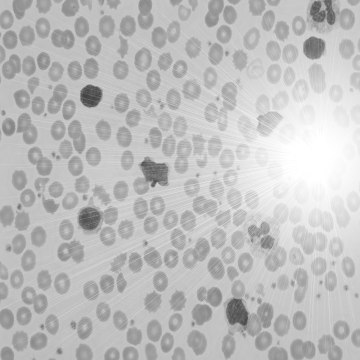

In [ ]:
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell-bright.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg1, cmap ='gray')
cv2_imshow(gImg1)

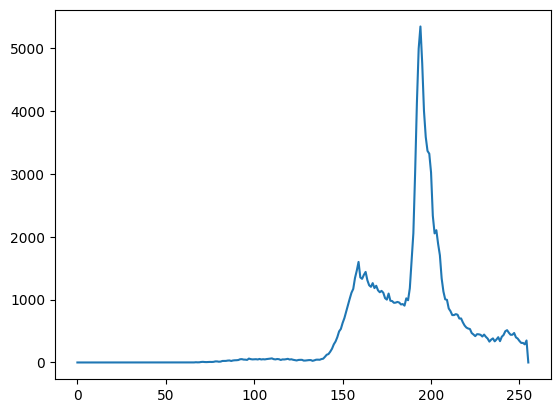

In [ ]:
hist = cv2.calcHist([gImg1],[0],None,[256],[0,255])
plt.plot(hist)

In [ ]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.ubyte)

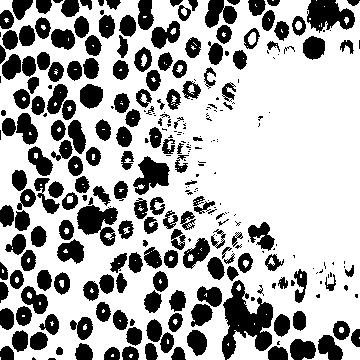

In [ ]:
Threshold = 180
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w] > Threshold:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0

cv2_imshow(gBin)

In [ ]:
T1 = 150
T2 = 0
T0 = 1

In [70]:
def threshold_update(img, bImg) :
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if bImg[h,w] == 0:
        sum1 += np.int32(img[h,w])
        count1 += 1
      else :
        sum2 += np.int32(img[h,w])
        count2 += 1

  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T

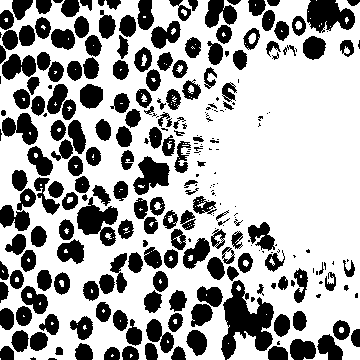

In [72]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w] > T1:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0

cv2_imshow(gBin)

183.12280539832983


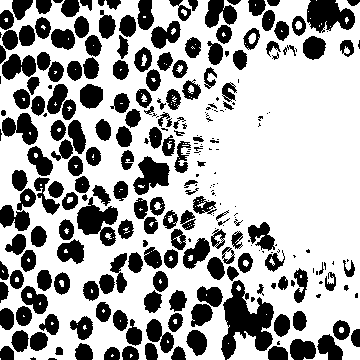

In [73]:
while True :
  T2 = threshold_update(gImg1, gBin)

  if np.abs(T1-T2) < T0 :
    break
  else :
    T1 = T2
    for h in range(gImg1.shape[0]):
      for w in range(gImg1.shape[1]):
        if gImg1[h,w] > T1 :
          gBin[h,w] = 255
        else :
          gBin[h,w] = 0

print(T1)
cv2_imshow(gBin)